## Modalitati de ingestie a datelor in Pandas

Pandas este o biblioteca esentiala in ecosistemul Python pentru manipularea si analiza datelor, oferind o gama diversa de functionalitati pentru prelucrarea seturilor de date intr-un mod eficient si intuitiv. Un pas primordial in orice proiect de analiza a datelor o reprezinta ingestia datelor sau incarcarea datelor in structurile de date specifice Pandas, precum DataFrame si Series.

Inainte de a explora mecanismele de ingestie a datelor, este esential sa includem bibliotecile necesare.

Pentru a putea utiliza bibliotecile pandas si numpy la nivelul unui notebook, este necesara includerea acestora folosind clauze import. Prin conventie, la includerea bibliotecilor pandas si numpy se utilizeaza urmatorii aliasi: pd pentru pandas, respectiv np pentru numpy.

![Pandas logo](https://pandas.pydata.org/static/img/pandas.svg)
<!-- <img src="../images/pandas_logo.png" width="300"> -->

In [1]:
import pandas as pd
import numpy as np

### Cuprins
1. [Incarcarea datelor din fisiere csv](#csv)
2. [Importul datelor JSON](#json)

### Incarcarea datelor din fisiere tabelare <a name="csv"></a>

Portalul [data.gov.ro](https://data.gov.ro/) a fost realizat in anul 2013 in scopul centralizarii datelor deschise publicate de institutiile din Romania conform principiilor si standardelor in domeniu.

<!-- <img src="https://data.gov.ro/assets/images/gov/gov3.png" width="400">-->
<img src="https://data.gov.ro/assets/images/gov/gov3.png" width="400">

In cadrul acestui portal pot fi identificate si date publicate de [Administratia Nationala de Meteorologie](https://data.gov.ro/organization/administratia-nationala-de-meteorologie). Printre altele, ANM ofera si setul de [date climatice de la cele 23 de statii esentiale](https://data.gov.ro/dataset/date-climatologice-de-la-cele-23-de-statii-esentiale-pentru-anul-2016), care acopera perioada 1961-2016 si cuprinde 56 de fisiere in format .csv. 

Fisierele CSV (Comma Separated Values) reprezinta fisiere text care contin inregistrari ale caror valori sunt separate prin intermediul virgulei (,). Fiecare linie de la nivelul unui astfel de fisier reprezinta o noua inregistrare din setul de inregistrari stocate la nivelul fisierului. In general, fisierele CSV se utilizeaza pentru transferul datelor intre diverse sisteme. 

Descarcam ultimul fisier de la nivelul acestui set de date in folderul data, folder care se gaseste in aceiasi locatie cu notebook-ul curent.

In [2]:
from urllib import request

# stabilim adresa web de unde urmeaza sa descarcam fisierul
remote_url = 'https://data.gov.ro/dataset/f649bad3-aa57-43ba-bf9e-bd8e9edde3f4/resource/4419b08f-4b1a-45fc-b88f-822bdacbe02d/download/climrbsn2016.csv'

# stabilim locatia in care salvam fisierul
local_file = '../data/climrbsn2016.csv'

# descarcam fisierul si il salvam local
request.urlretrieve(remote_url, local_file)

('../data/climrbsn2016.csv', <http.client.HTTPMessage at 0x14da601a5d0>)

Citirea fisierelor text care contin valori delimitate prin intermediul unui separator (in acest caz, delimitatorul implicit este virgula) se realizeaza prin intermediul metodei [pandas.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [3]:
# citim fisierul local de tip csv si incarcam datele in variabila data
data_csv = pd.read_csv("../data/climrbsn2016.csv")

In [4]:
type(data_csv)

pandas.core.frame.DataFrame

Pentru a vizualiza un mic esantion dintr-o structura de tip Series sau DataFrame, in Pandas pot fi utilizate metode de tip head() sau tail(). Implicit, acestea returneaza primele/ultimele 5 inregistrari de la nivelul structurii de date.

In [5]:
data_csv.head()

,CODST,ALT,LAT,LON,DATCLIM,TMED,TMAX,TMIN,R24
0,15015,503.0,47.776944,23.940556,2016/01/01 00,-10.0,-5.7,-13.6,NaN
1,15015,503.0,47.776944,23.940556,2016/01/02 00,-11.0,-5.9,-14.4,NaN
2,15015,503.0,47.776944,23.940556,2016/01/03 00,-12.2,-5.5,-16.4,NaN
3,15015,503.0,47.776944,23.940556,2016/01/04 00,-11.0,-5.3,-16.6,0.0
4,15015,503.0,47.776944,23.940556,2016/01/05 00,-5.7,-4.6,-8.1,1.5


In [6]:
data_csv.sample(10)

,CODST,ALT,LAT,LON,DATCLIM,TMED,TMAX,TMIN,R24
6742,15420,90.0,44.510556,26.078056,2016/06/03 00,18.0,25.4,11.7,1.8
5749,15350,97.0,45.132778,26.851667,2016/09/16 00,21.5,30.7,12.2,NaN
2265,15170,661.0,46.371389,25.772500,2016/03/10 00,6.1,9.6,3.5,2.1
3905,15280,2504.0,45.445833,25.456667,2016/09/02 00,6.0,9.5,3.9,NaN
6456,15410,77.0,44.626389,22.626111,2016/08/22 00,22.0,28.4,19.2,1.0
591,15020,161.0,47.735556,26.645556,2016/08/13 00,17.1,22.8,11.6,NaN
6933,15420,90.0,44.510556,26.078056,2016/12/11 00,5.3,12.5,1.2,NaN
2090,15150,174.0,46.557778,26.896667,2016/09/17 00,20.0,31.4,11.6,NaN
6694,15420,90.0,44.510556,26.078056,2016/04/16 00,12.7,23.9,3.4,NaN
1449,15108,1897.0,46.977500,25.950000,2016/12/17 00,-9.0,-6.6,-11.0,NaN


In imaginea precedenta putem observa caracteristicile de la nivelul structurii de date: CODST (cod statie), ALT (altitudine), LAT (latitudine), LON (longitudine), DATCLIM (data), TMED (temperatura medie), TMAX (temperatura maxima), TMIN (temperatura minima), R24.

Descoperirea si intelegerea setului de date importat la nivelul structurii de date de tip DataFrame (data) are in vedere doua aspecte foarte importante:
* intelegerea structurii de date: numarul de linii si coloane, denumirea coloanelor, tipurile de date alocate coloanelor;
* intelegerea datelor: valorile stocate la nivelul coloanelor.

Pentru a intelege structura setului de date pot fi utilizate proprietati si metode ale structurii de date, precum [pandas.DataFrame.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html), [pandas.DataFrame.shape](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html), [pandas.Dataframe.columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html). 

Metoda [pandas.DataFrame.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) afiseaza informatii generale cu privire la structura de date de tip DataFrame, inclusiv tipul de date al valorilor de la nivelul coloanelor, denumirile coloanelor, valorile nenule, dar si informatii cu privire la utilizarea memoriei.

In [7]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8418 entries, 0 to 8417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODST    8418 non-null   int64  
 1   ALT      8418 non-null   float64
 2   LAT      8418 non-null   float64
 3   LON      8418 non-null   float64
 4   DATCLIM  8418 non-null   object 
 5   TMED     8418 non-null   float64
 6   TMAX     8418 non-null   float64
 7   TMIN     8418 non-null   float64
 8   R24      3155 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 592.0+ KB


Proprietatea [pandas.DataFrame.shape](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) returneaza un tuplu care reprezinta dimensionalitatea structurii de date, adica numarul de linii si de coloane de la nivelul acesteia. Astfel, putem observa faptul ca structura beneficiaza de are 8418 linii si 9 coloane.

In [8]:
data_csv.shape

(8418, 9)

Denumirile coloanelor pot fi obtinute la nivelul unei obiect folosind proprietatea [pandas.DataFrame.columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html). Prin intermediul acestei proprietati exista si posibilitatea modificarii/actualizarii denumirilor coloanelor. 

In [9]:
data_csv.columns

Index(['CODST', 'ALT', 'LAT', 'LON', 'DATCLIM', 'TMED', 'TMAX', 'TMIN', 'R24'], dtype='object')

In [10]:
data_csv.columns = data_csv.columns.str.strip()

In [11]:
data_csv.columns = [col.lower() for col in data_csv.columns]
data_csv.columns

Index(['codst', 'alt', 'lat', 'lon', 'datclim', 'tmed', 'tmax', 'tmin', 'r24'], dtype='object')

### Relevanta tipurilor de date in analiza statistica

Distingerea corecta intre datele numerice si datele categorice este cruciala, influentand aplicabilitatea diverselor metode statistice. De exemplu, coloanele reprezentand coduri postale sau numere de identificare, desi numerice, ar trebui tratate ca date categorice pentru a preveni interpretari eronate in analiza.

Un tip de date reprezinta o constructie interna pe care un limbaj de programare o foloseste pentru a intelege cum sa stocheze si manipuleze datele. In analiza datelor, este foarte important sa ne asiguram ca utilizam tipurile de date corecte. In caz contrar, putem obtine rezultate neasteptate sau chiar erori. Mecanismele de baza pentru ingestia simpla a datelor de la nivelul bibliotecii Pandas deduc, in general, corect tipurile de date.  

In cele ce urmeaza, utilizam atributul [pandas.DataFrame.dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html) pentru a afisa coloanele de la nivelul structurii de date de tip DataFrame (data) impreuna cu tipul de date asociat acestora. 

In [12]:
data_csv.dtypes

codst        int64
alt        float64
lat        float64
lon        float64
datclim     object
tmed       float64
tmax       float64
tmin       float64
r24        float64
dtype: object

Metoda [pandas.Series.unique()](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html) returneaza valorile unice de la nivelul unui obiect de tip Series. In cazul nostru, valorile fiecarei coloane pot fi gestionate prin intermediul unui astfel de obiect. In felul acesta putem determina valorile unice ale unei coloane, precum codst (codul statiei). 

Tipurile de date reprezinta un aspect important al analizei statistice, care trebuie inteles bine pentru a putea aplica corect metode statistice. Din acest punct de vedere exista 2 tipuri principale de date, si anume: date numerice si date categorice. 
Datele numerice, dupa cum si numele o sugereaza, se refera la variabile numerice, in timp ce datele categorice sunt de obicei grupate intr-una sau mai multe categorii. 

Cunoscute si sub numele de date calitative, fiecare element al unui set de date categorice poate fi incadrat intr-o singura categorie in functie de calitatile sale. De exemplu, sexul este o data categorica deoarece poate fi clasificat in masculin si feminin in functie de anumite calitati unice. 

Datele numerice sunt compatibile cu majoritatea metodelor statistice de analiza a datelor, aspect care nu este valabil in cazul datelor categorice.

<!-- ![Types of data](../images/data_types.png) -->
<img src="https://www.legac.com.au/cdn/shop/articles/Picture1.png" width="800">

[Further Mathematics - Unit 3 - Data Analysis - Types of Data](https://legac.com.au/blogs/further-mathematics-exam-revision/further-mathematics-unit-3-data-analysis-types-of-data)

Atat datele numerice, cat si cele categorice pot lua valori numerice. Datele categorice pot lua valori numerice, precum numar identificare, cod postal, numar telefon, dar aceste valori nu prezinta semnificatie matematica.  

Observam faptul ca la nivelul coloanei codst sunt disponibile doar 23 de valori care reprezinta identificatorul fiecarei statii meteorologice pentru care sunt realizate masuratori.

In [13]:
data_csv['codst'].unique()

array([15015, 15020, 15090, 15108, 15120, 15150, 15170, 15200, 15230,
       15260, 15280, 15292, 15310, 15335, 15346, 15350, 15360, 15410,
       15420, 15450, 15460, 15470, 15480])

Cea mai simpla modalitate de conversie a unei coloane la tipul category o reprezinta [pandas.DataFrame.astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html), metoda care permite trecerea unui obiect Pandas la un tip de date specificat explicit.

In [14]:
data_csv['codst'] = data_csv['codst'].astype('category')

In [15]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8418 entries, 0 to 8417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   codst    8418 non-null   category
 1   alt      8418 non-null   float64 
 2   lat      8418 non-null   float64 
 3   lon      8418 non-null   float64 
 4   datclim  8418 non-null   object  
 5   tmed     8418 non-null   float64 
 6   tmax     8418 non-null   float64 
 7   tmin     8418 non-null   float64 
 8   r24      3155 non-null   float64 
dtypes: category(1), float64(7), object(1)
memory usage: 535.2+ KB


Pentru descoperirea si intelegerea datelor prezinta interes o serie de metode definite in Pandas pentru lucrul cu structuri de date, precum: [pandas.DataFrame.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html), [pandas.DataFrame.head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html), [pandas.DataFrame.tail()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html). Metodele si proprietatile precizate mai sus pentru structurile de date de tip DataFrame sunt definite inclusiv la nivelul structurilor de date de tip Series, cea ce-a doua modalitate de stocare si gestionare a datelor in Pandas.

In [16]:
data_csv.describe()

,alt,lat,lon,tmed,tmax,tmin,r24
count,8418.000000,8418.000000,8418.000000,8418.000000,8418.000000,8418.000000,3155.000000
mean,362.504348,45.653587,25.555000,10.355524,15.862236,5.842492,5.341395
std,597.997236,1.096888,2.226897,9.670633,10.988680,8.798955,8.610003
min,4.360000,44.107222,21.353611,-22.400000,-19.700000,-24.000000,0.000000
25%,74.290000,44.626389,23.866944,3.700000,7.800000,0.000000,0.500000
50%,161.000000,45.445833,25.772500,10.100000,15.500000,6.100000,2.000000
75%,410.000000,46.557778,27.338333,18.500000,25.500000,12.800000,6.450000
max,2504.000000,47.776944,29.726944,29.500000,37.800000,26.100000,92.000000


In [17]:
data_csv.describe(include='all')

,codst,alt,lat,lon,datclim,tmed,tmax,tmin,r24
count,8418.0,8418.000000,8418.000000,8418.000000,8418,8418.000000,8418.000000,8418.000000,3155.000000
unique,23.0,NaN,NaN,NaN,366,NaN,NaN,NaN,NaN
top,15015.0,NaN,NaN,NaN,2016/12/31 00,NaN,NaN,NaN,NaN
freq,366.0,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN
mean,NaN,362.504348,45.653587,25.555000,NaN,10.355524,15.862236,5.842492,5.341395
std,NaN,597.997236,1.096888,2.226897,NaN,9.670633,10.988680,8.798955,8.610003
min,NaN,4.360000,44.107222,21.353611,NaN,-22.400000,-19.700000,-24.000000,0.000000
25%,NaN,74.290000,44.626389,23.866944,NaN,3.700000,7.800000,0.000000,0.500000
50%,NaN,161.000000,45.445833,25.772500,NaN,10.100000,15.500000,6.100000,2.000000
75%,NaN,410.000000,46.557778,27.338333,NaN,18.500000,25.500000,12.800000,6.450000


Implicit, metoda [pandas.DataFrame.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) genereaza valori statistice corespunzatoare datelor din fiecare coloana de tip numeric. Astfel, sunt disponibile: numarul de observatii nenule, valoarea maxima, valoare minima, valoarea medie, deviatia standard a observatiilor, dar si percentilele 25. 50 si 75.
Percentilele sunt utilizate in statistica pentru a intelege si interpreta datele. De exemplu, percentila a 25-a unui set de date reprezinta valoarea la care 25% din date se afla sub aceasta valoare. 

In [18]:
data_csv.quantile(q=.25, axis=0, numeric_only=True)

alt     74.290000
lat     44.626389
lon     23.866944
tmed     3.700000
tmax     7.800000
tmin     0.000000
r24      0.500000
Name: 0.25, dtype: float64

In [19]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8418 entries, 0 to 8417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   codst    8418 non-null   category
 1   alt      8418 non-null   float64 
 2   lat      8418 non-null   float64 
 3   lon      8418 non-null   float64 
 4   datclim  8418 non-null   object  
 5   tmed     8418 non-null   float64 
 6   tmax     8418 non-null   float64 
 7   tmin     8418 non-null   float64 
 8   r24      3155 non-null   float64 
dtypes: category(1), float64(7), object(1)
memory usage: 535.2+ KB


In [20]:
data_csv.describe(include=[object, 'category'])

,codst,datclim
count,8418,8418
unique,23,366
top,15015,2016/12/31 00
freq,366,23


Daca este precizat parametrul include cu valoarea all, metoda ofera in plus pentru coloanele de tip object numarul de valori unice, cea mai comuna valoare si frecventa celei mai comune valori. Precizarea valorii [object] pentru parametrul include, determina includerea in rezultat doar a coloanelor care prezinta acest domeniu de definitie.

Dupa cum am precizat si mai sus, metodele de tip head() si tail() returneaza un numar de observatii de la nivelul structurii. Prin transmiterea unui argument la nivelul acestor metode, nu vor mai fi avute in vedere primele / ultimele 5 inregistrari de la nivelul structurii, ci numarul de inregistrari precizate explicit.

In [21]:
data_csv.head(3)

,codst,alt,lat,lon,datclim,tmed,tmax,tmin,r24
0,15015,503.0,47.776944,23.940556,2016/01/01 00,-10.0,-5.7,-13.6,NaN
1,15015,503.0,47.776944,23.940556,2016/01/02 00,-11.0,-5.9,-14.4,NaN
2,15015,503.0,47.776944,23.940556,2016/01/03 00,-12.2,-5.5,-16.4,NaN


In [22]:
data_csv.tail(3)

,codst,alt,lat,lon,datclim,tmed,tmax,tmin,r24
8415,15480,12.8,44.213889,28.645556,2016/12/29 00,1.6,2.7,0.5,0.0
8416,15480,12.8,44.213889,28.645556,2016/12/30 00,0.4,1.5,-0.5,0.6
8417,15480,12.8,44.213889,28.645556,2016/12/31 00,-1.5,1.5,-2.8,0.0


### Vizualizarea datelor: de la boxplot-uri la histograme

In etapele initiale ale explorarii datelor, vizualizarile joacă un rol important in identificarea tendintelor, distributiilor si potentialelor valori aberante. Pandas ofera facilitati pentru generarea rapida a boxplot-urilor si histogramelor, care pot oferi insight-uri valoroase despre setul de date analizat.

O diagrama de tip boxplot este o metoda de reprezentare grafica a grupurilor de date numerice prin intermediul cuartilelor acestora. Dreptunghiul/cutia (box) se intinde de la valorile cuartilelor Q1 pana la Q3, cu o linie mediana (Q2). Mustatile (whiskers) se intind de la marginile cutiei pentru a arata intervalul de variatie a datelor. Pozitia mustatilor este setata implicit la 1.5*IQR, unde IQR este intercuartila (IQR = Q3-Q1) sau intervalul dintre quartile. Punctele aberante (outliers) se gasesc dincolo de capatul mustatilor.

<Axes: >

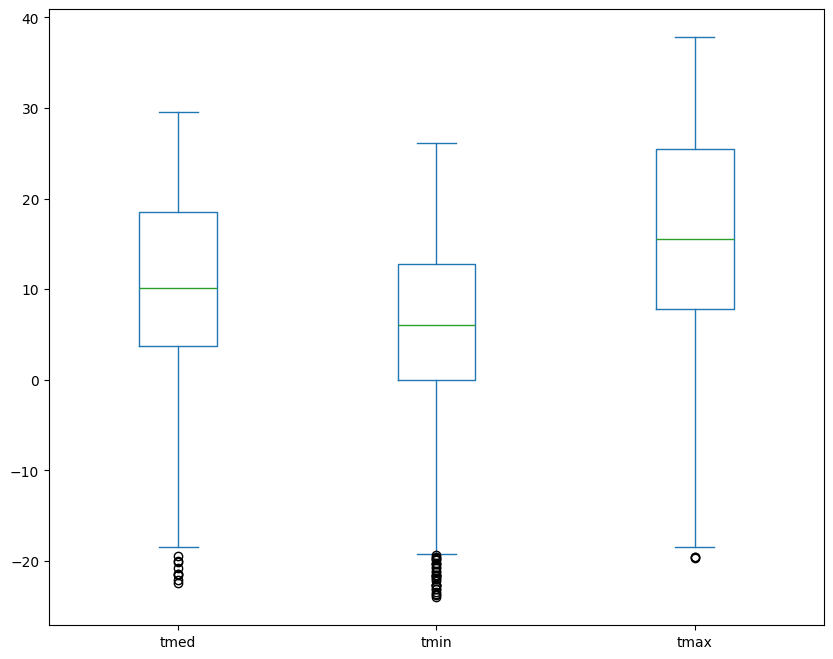

In [23]:
data_csv[['tmed', 'tmin', 'tmax']].plot.box(figsize=(10,8))

O histograma este o reprezentarea a distributiei datelor. Histogramele indica numarul de valori care se afla intr-un anumit interval de valori. Functia [pandas.DataFrame.plot.hist()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html) grupeaza valorile de la nivelul coloanelor structurii de date in clase sau pubele (bins).

<Axes: ylabel='Frequency'>

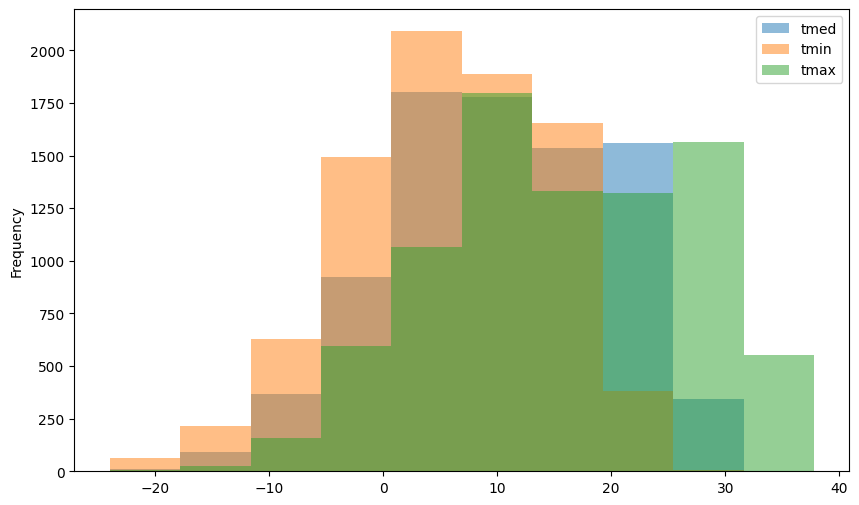

In [24]:
data_csv[['tmed', 'tmin', 'tmax']].plot.hist(bins=10, alpha=0.5, figsize=(10,6))

Primul argument al metodei [pandas.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html), filepath_or_buffer, permite specificarea unui sir de caractere corespunzator unei cai valide. Sirul poate include si un URL valid (http, ftp, s3, gs sau file). 

In [25]:
# cititi fisierul remote de tip csv si incarcati datele in variabila data
data_tmp = pd.read_csv("https://data.gov.ro/dataset/f649bad3-aa57-43ba-bf9e-bd8e9edde3f4/resource/4419b08f-4b1a-45fc-b88f-822bdacbe02d/download/climrbsn2016.csv")

In [26]:
data_tmp.head()

,CODST,ALT,LAT,LON,DATCLIM,TMED,TMAX,TMIN,R24
0,15015,503.0,47.776944,23.940556,2016/01/01 00,-10.0,-5.7,-13.6,NaN
1,15015,503.0,47.776944,23.940556,2016/01/02 00,-11.0,-5.9,-14.4,NaN
2,15015,503.0,47.776944,23.940556,2016/01/03 00,-12.2,-5.5,-16.4,NaN
3,15015,503.0,47.776944,23.940556,2016/01/04 00,-11.0,-5.3,-16.6,0.0
4,15015,503.0,47.776944,23.940556,2016/01/05 00,-5.7,-4.6,-8.1,1.5


Fisierele TSV (Tab Separated Values) reprezinta fisiere text care contin inregistrari ale caror valori sunt separate prin intermediul tab-ului (\t). Fiecare linie de la nivelul unui astfel de fisier reprezinta o noua inregistrare din setul de inregistrari stocate la nivelul fisierului. In general, fisierele TSV se utilizeaza pentru transferul datelor intre diverse sisteme.

In [27]:
# cititi fisierul remote de tip csv si incarcati datele in variabila data
data_tsv = pd.read_csv("../data/climrbsn2016.tsv", sep="\t", header=0)

In [28]:
data_tsv.head()

,CODST,ALT,LAT,LON,DATCLIM,TMED,TMAX,TMIN,R24
0,15015,503.0,47.776944,23.940556,2016/01/01 00,-10.0,-5.7,-13.6,NaN
1,15015,503.0,47.776944,23.940556,2016/01/02 00,-11.0,-5.9,-14.4,NaN
2,15015,503.0,47.776944,23.940556,2016/01/03 00,-12.2,-5.5,-16.4,NaN
3,15015,503.0,47.776944,23.940556,2016/01/04 00,-11.0,-5.3,-16.6,0.0
4,15015,503.0,47.776944,23.940556,2016/01/05 00,-5.7,-4.6,-8.1,1.5


### Importul datelor JSON <a name="json"></a>

JavaScript Object Notation (JSON) este un standard deschis care permite reprezentarea datelor ca si perechi de tipul nume-valoare si liste ordonate de valori. Derivat din sintaxa obiectelor de la nivelul limbajului JavaScript (de unde si numele sau, JavaScript Object Notation), JSON reprezinta cel mai popular format pentru schimbul de date intre diverse sisteme. 

Desi formatul JSON are ca si punct de plecare limbajul de programare JavaScript, el prezinta suport, direct sau prin intermediul unor biblioteci, pentru marea majoritate a limbajelor de programare. In momentul de fata, JSON este utilizat in mod obisnuit pentru a realiza schimbul de date intre clientii si serverele web.

O interfata de programare a aplicatiilor (API: Application Programming Interface) este un serviciu web care ofera acces la date pe care alte aplicatii le pot accesa prin intermediul protocoalelor HTTP. Un API poate fi usor integrat intr-o varietate de aplicatii. REpresentational State Transfer (REST) reprezinta cea mai populara arhitectura de API-uri pentru servicii web, conceputa pentru a simplifica comunicarea client-server.

[OpenWeather](https://openweathermap.org/) este un serviciu web comercial care ofera date meteorologice istorice, actuale si prognozate pentru orice locatie geografica. Accesarea unui API de tip REST, precum cel oferit de serviciul OpenWeather poate fi realizata prin intermediul bibliotecii Python [Requests](https://pypi.org/project/requests/).

Pentru a putea utiliza elemente de la nivelul bibliotecii Requests, mai intai este necesara includerea acesteia. Dupa stabilirea valorilor pentru parametrii de la nivelul API-ului (lat - latitudine, lon - longitudine, type - tip apel (hour), start - data inceput, end - data final, appid - identificator aplicatie), putem accesa date prin intermediul metodei GET.

In [ ]:
import requests

# stabilim parametri de la nivelul adresei la care este oferit API-ul
api_url = 'https://history.openweathermap.org/data/2.5/history/city';
params = {"lat": "45.76",
          "lon": "21.22",
          "type": "hour",
          "units": "metric",
          "start": "1640988000",
          "end": "1648897200", 
          "appid": "api-key"}

# accesam datele de la nivelul API-ului
response = requests.get(api_url, params=params)

In [30]:
type(response)

requests.models.Response

In [31]:
response

<Response [401]>

Obiectul response contine toate datele si metadatele trimise de server ca urmare a cererii de tip GET. Pentru a accesa doar datele de la nivelul raspunsului poate fi utilizata metoda response.json(), care returneaza continutul sub forma unui dictionar.

In [32]:
type(response.json())

dict

In [33]:
response.json()

{'cod': 401,
 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}

In [34]:
# extragem datele din obiectul raspuns
data_tmp = response.json()

Exemplul JSON de mai jos reprezinta o prognoza meteo care contine informatii generale (cum ar fi `message`, `cod`, `city_id`, etc.) si o lista de prognoze (`list`). Fiecare intrare din lista include ora la care se realizeaza estimarea (`dt`), temperatura, presiunea, detaliile despre umiditate (`main`), viteza vantului (`wind`), acoperirea norilor (`clouds`) si conditiile meteorologice (`weather`). Atributul `weather` este la randul sau o lista care contine unul sau mai multe elemente care descriu conditiile meteorologice, cum ar fi ceata sau nori.

{'message': 'Count: 169',
 'cod': '200',
 'city_id': 1,
 'calctime': 0.007814431,
 'cnt': 169,
 'list': [{'dt': 1640988000,
   'main': {'temp': 3.39,
    'feels_like': 1.43,
    'pressure': 1021,
    'humidity': 98,
    'temp_min': 2.89,
    'temp_max': 4.1},
   'wind': {'speed': 2.06, 'deg': 120},
   'clouds': {'all': 50},
   'weather': [{'id': 802,
     'main': 'Clouds',
     'description': 'scattered clouds',
     'icon': '03n'}]},
  {'dt': 1640991600,
   'main': {'temp': 4.22,
    'feels_like': 4.22,
    'pressure': 1021,
    'humidity': 98,
    'temp_min': 3.99,
    'temp_max': 4.43},
   'wind': {'speed': 1.03, 'deg': 40},
   'clouds': {'all': 60},
   'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'},
    {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}]}, 
    ...
}

In [35]:
# salvam local raspunsul intr-un fisier .json
# open('../data/openweather.json', 'wb').write(response.content)

In [36]:
# citim fisierul local de tip json si incarcam datele in variabila data
data = pd.read_json("../data/openweather.json", orient="records")

In [37]:
data

,message,cod,city_id,calctime,cnt,list
0,Count: 169,200,1,0.007337,169,"{'dt': 1640988000, 'main': {'temp': 3.39, 'fee..."
1,Count: 169,200,1,0.007337,169,"{'dt': 1640991600, 'main': {'temp': 4.22, 'fee..."
2,Count: 169,200,1,0.007337,169,"{'dt': 1640995200, 'main': {'temp': 3.6, 'feel..."
3,Count: 169,200,1,0.007337,169,"{'dt': 1640998800, 'main': {'temp': 3.7, 'feel..."
4,Count: 169,200,1,0.007337,169,"{'dt': 1641002400, 'main': {'temp': 4.37, 'fee..."
...,...,...,...,...,...,...
164,Count: 169,200,1,0.007337,169,"{'dt': 1641578400, 'main': {'temp': -0.13, 'fe..."
165,Count: 169,200,1,0.007337,169,"{'dt': 1641582000, 'main': {'temp': -0.9500000..."
166,Count: 169,200,1,0.007337,169,"{'dt': 1641585600, 'main': {'temp': -0.66, 'fe..."
167,Count: 169,200,1,0.007337,169,"{'dt': 1641589200, 'main': {'temp': -1.24, 'fe..."


In [38]:
data['list'][100]['wind']

{'speed': 1.34, 'deg': 158, 'gust': 3.58}

Pentru structurile JSON, metoda [pd.json_normalize()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html) poate fi extrem de utila, permitand aplatizarea datele intr-un format tabular care faciliteaza analiza ulterioara.

In exemplul urmator, functia `json_normalize` din biblioteca pandas este utilizata pentru a converti o structura de date JSON imbricata intr-o structura tabelara (adica un DataFrame). Această transformare este deosebit de utila pentru a analiza date JSON complexe, imbricate, cu ajutorul pandas. O analiza a componentelor cheie si a rolului lui `record_path` si `meta` in acest exemplu specific:

Obiectivul este acela de a aplatiza aceasta structura JSON complexa imbricata intr-o structura de tip pandas DataFrame pentru o analiza mai usoara. In mod specific, dorim un rand pentru fiecare element din lista `weather` din toate intrările estimate, impreuna cu informatii selectate din structurile parinte (cum ar fi temperatura, viteza vantului etc.).

In [39]:
data_json = pd.json_normalize(data['list'], 
                         meta=['dt', 
                               ['main', 'temp'], ['main', 'feels_like'], ['main', 'pressure'], ['main', 'humidity'], \
                               ['main', 'temp_min'], ['main', 'temp_max'], \
                               ['wind', 'speed'], ['wind', 'deg'], ['wind', 'gust'], \
                               ['clouds', 'all'],
                               ['rain', '1h'], 
                               ['snow', '1h']
                              ], 
                         record_path=['weather'], errors='ignore')

Parametrul `record_path` specifica modul de parcurgere a documentului JSON pentru a gasi lista de inregistrari pe care dorim sa le introducem in liniile din cadrul structurii de tip DataFrame. In acest exemplu, `record_path=['weather']` indica faptul ca functia ar trebui sa caute listele localizate sub cheia `weather` in interiorul fiecarui element din `list`. Acest parametru este esential pentru identificarea datelor imbricate care trebuie convertite direct in linii in structura de date de tip DataFrame rezultata.

Parametrul `meta` specifica informatiile suplimentare care ar trebui sa fie incluse alaturi de fiecare inregistrare extrasa prin intermediul `record_path`. Acestea sunt, in esenta, coloanele care vor fi adaugate pentru a completa fiecare inregistrare `weather` in DataFrame. 

In exemplul de mai sus, pentru fiecare inregistrare meteorologica (cum ar fi ceata, nori etc.), includem, de asemenea, urmatoarele date:
  - data si ora (`dt`),
  - diverse inregistrari din sectiunea `main`, cum ar fi temperatura (`temp`, `feels_like`, `pressure`, `humidity`, `temp_min` si `temp_max`,
  - informatii despre vant provenite din `wind`, adica `speed`, `deg` si `gust` (daca sunt disponibile, in caz contrar vor fi ignorate datorita parametrului `errors` care prezinta valoarea `'ignore'`),
  - prezenta norilor (`clouds['all']`) si precipitatiile, daca sunt disponibile, `rain['1h']` si `snow['1h']`.

Fiecare dintre aceste atribute `meta` este specificat ca o cale catre valoarea de interes, in raport cu fiecare element din `list`. Pentru valorile imbricate, calea este reprezentata ca o lista, de exemplu, `['main', 'temp']` pentru temperatura.

Argumentul `errors='ignore'` transmite functiei `json_normalize` obligatia de a ignora orice date lipsa pentru caile specificate. De exemplu, este posibil ca nu toate estimarile sa prezinte datele `rain['1h']` sau `wind['gust']`. Setarea `errors='ignore'` asigura faptul ca functia nu va genera o eroare din cauza acestor elemente lipsa, precum si ca va ignora aceste campuri pentru inregistrarile care nu le detin.

In [40]:
data_json.head()

,id,main,description,icon,dt,main.temp,main.feels_like,main.pressure,main.humidity,main.temp_min,main.temp_max,wind.speed,wind.deg,wind.gust,clouds.all,rain.1h,snow.1h
0,802,Clouds,scattered clouds,03n,1640988000,3.39,1.43,1021,98,2.89,4.1,2.06,120,NaN,50,NaN,NaN
1,741,Fog,fog,50n,1640991600,4.22,4.22,1021,98,3.99,4.43,1.03,40,NaN,60,NaN,NaN
2,701,Mist,mist,50n,1640991600,4.22,4.22,1021,98,3.99,4.43,1.03,40,NaN,60,NaN,NaN
3,701,Mist,mist,50n,1640995200,3.6,3.6,1020,98,1.95,5.1,0.45,158,0.45,20,NaN,NaN
4,701,Mist,mist,50n,1640998800,3.7,1.79,1020,98,2.1,6.21,2.06,80,NaN,100,NaN,NaN


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   message   169 non-null    object 
 1   cod       169 non-null    int64  
 2   city_id   169 non-null    int64  
 3   calctime  169 non-null    float64
 4   cnt       169 non-null    int64  
 5   list      169 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 8.1+ KB


In [42]:
data.columns

Index(['message', 'cod', 'city_id', 'calctime', 'cnt', 'list'], dtype='object')

In [43]:
data2 = pd.json_normalize(data['list'], max_level=2).head()

In [44]:
data2.head()

,dt,weather,main.temp,main.feels_like,main.pressure,main.humidity,main.temp_min,main.temp_max,wind.speed,wind.deg,clouds.all,wind.gust,rain.1h,snow.1h
0,1640988000,"[{'id': 802, 'main': 'Clouds', 'description': ...",3.39,1.43,1021,98,2.89,4.10,2.06,120,50,NaN,NaN,NaN
1,1640991600,"[{'id': 741, 'main': 'Fog', 'description': 'fo...",4.22,4.22,1021,98,3.99,4.43,1.03,40,60,NaN,NaN,NaN
2,1640995200,"[{'id': 701, 'main': 'Mist', 'description': 'm...",3.60,3.60,1020,98,1.95,5.10,0.45,158,20,0.45,NaN,NaN
3,1640998800,"[{'id': 701, 'main': 'Mist', 'description': 'm...",3.70,1.79,1020,98,2.10,6.21,2.06,80,100,NaN,NaN,NaN
4,1641002400,"[{'id': 701, 'main': 'Mist', 'description': 'm...",4.37,2.57,1020,98,2.95,6.21,2.06,110,20,NaN,NaN,NaN


In [45]:
data2.columns

Index(['dt', 'weather', 'main.temp', 'main.feels_like', 'main.pressure',
       'main.humidity', 'main.temp_min', 'main.temp_max', 'wind.speed',
       'wind.deg', 'clouds.all', 'wind.gust', 'rain.1h', 'snow.1h'],
      dtype='object')

Ingestia datelor in Pandas reprezinta fundatia oricarui proiect de analiza de date, deschizand calea catre explorare, pre-procesare si, in cele din urma, extragerea de insight-uri valoroase. Prin aplicarea practica a tehnicilor prezentate, putem transforma seturi de date brute in informatii valoroase, stimuland decizii bazate pe date intr-un context specific.